<a href="https://colab.research.google.com/github/SoujanyaMirajkar/Alzheimer-s-Disease/blob/main/Filling_of_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import skew

In [ ]:
df= pd.read_csv("Alzheimer_Disease.csv")
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21400\820556264.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("Alzheimer_Disease.csv")


,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation
0,A1,2021,2021,WEST,West,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,28.8,34.4,Percentage,31.6,NaN,NaN,Hispanic,NaN
1,A2,2017,2017,NRE,Northeast,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,49.1,51.6,Percentage,50.3,65 years or older,NaN,NaN,NaN
2,A3,2019,2019,MDW,Midwest,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,13.8,14.8,Percentage,14.3,NaN,NaN,NaN,NaN
3,A4,2020,2020,US,"United States, DC & Territories",Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,54.5,56.4,Percentage,55.5,65 years or older,Female,NaN,NaN
4,A5,2020,2020,NH,New Hampshire,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,12.8,18,Percentage,15.2,50-64 years,Female,NaN,POINT (-71.50036091999965 43.65595011300047)


In [ ]:
df.columns

Index(['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Class', 'Topic', 'Question', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Data_Value_Type', 'Data_Value', 'Age',
       'Gender', 'Ethnicity', 'Geolocation'],
      dtype='object')

In [ ]:
df.describe()

,YearStart,YearEnd,Low_Confidence_Limit,High_Confidence_Limit,Data_Value
count,250937.000000,250937.000000,169126.000000,169126.000000,169302.000000
mean,2017.940933,2018.169716,32.698188,42.243840,37.328349
std,2.031564,2.081039,24.288904,26.165896,25.213181
min,2015.000000,2015.000000,-0.700000,1.400000,0.000000
25%,2016.000000,2016.000000,12.400000,19.400000,15.700000
50%,2018.000000,2018.000000,26.600000,38.300000,32.300000
75%,2020.000000,2020.000000,48.400000,64.000000,56.000000
max,2021.000000,2021.000000,99.600000,100.000000,100.000000


# Age
0 - 50-64
1 - 65 or higher

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example dataframe with NaN values

# Creating label encoder
label_encoder = LabelEncoder()

# Handling NaN: temporarily fill NaN with a placeholder
placeholder = 'Missing'  # This should be a value not present in the data
df['Age'].fillna(placeholder, inplace=True)

# Fitting the encoder to the data (including the placeholder for NaN)
df['Age'] = label_encoder.fit_transform(df['Age'])

# Replace placeholder index back to NaN in the encoded data
placeholder_index = label_encoder.transform([placeholder])[0]
df['Age'] = df['Age'].replace(placeholder_index, pd.NA)

# Restoring NaN in the original column if desired
df['Age'].replace(placeholder, pd.NA, inplace=True)

# Output the original and encoded data
#df


# Ethnicity


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Creating label encoder
label_encoder = LabelEncoder()

# Handling NaN: temporarily fill NaN with a placeholder
placeholder = 'Missing'  # Use a unique placeholder not present in the actual data
df['Ethnicity'].fillna(placeholder, inplace=True)

# Fitting the encoder to the data (including the placeholder for NaN)
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])

# Replace placeholder index back to NaN in the encoded data
placeholder_index = label_encoder.transform([placeholder])[0]
df['Ethnicity'] = df['Ethnicity'].replace(placeholder_index, pd.NA)

# Restoring NaN in the original column if desired
df['Ethnicity'].replace(placeholder, pd.NA, inplace=True)

# Output the original and encoded data
#print(df)

# Print the mapping from categories to integers
print("\nCategory to Integer Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")
#df


Category to Integer Mapping:
Asian/Pacific Islander: 0
Black, non-Hispanic: 1
Hispanic: 2
Missing: 3
Native Am/Alaskan Native: 4
White, non-Hispanic: 5


In [ ]:
# Print the mapping from categories to integers
print("\nCategory to Integer Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")



Category to Integer Mapping:
Asian/Pacific Islander: 0
Black, non-Hispanic: 1
Hispanic: 2
Missing: 3
Native Am/Alaskan Native: 4
White, non-Hispanic: 5


# Class

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Creating label encoder
label_encoder = LabelEncoder()

# Fitting the encoder to the data
df['Class'] = label_encoder.fit_transform(df['Class'])

# Output the original and encoded data
#df


In [ ]:
# Print the mapping from categories to integers
print("\nCategory to Integer Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")



Category to Integer Mapping:
Caregiving: 0
Cognitive Decline: 1
Mental Health: 2
Nutrition/Physical Activity/Obesity: 3
Overall Health: 4
Screenings and Vaccines: 5
Smoking and Alcohol Use: 6


## Gender

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Creating label encoder
label_encoder = LabelEncoder()

# Handling NaN: temporarily fill NaN with a placeholder
placeholder = 'Missing'  # Use a unique placeholder not present in the actual data
df['Gender'].fillna(placeholder, inplace=True)

# Fitting the encoder to the data (including the placeholder for NaN)
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Replace placeholder index back to NaN in the encoded data
placeholder_index = label_encoder.transform([placeholder])[0]
df['Gender'] = df['Gender'].replace(placeholder_index, pd.NA)

# Restoring NaN in the original column if desired
df['Gender'].replace(placeholder, pd.NA, inplace=True)

# Output the original and encoded data
#print(df)

# Print the mapping from categories to integers
print("\nCategory to Integer Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")
#df


Category to Integer Mapping:
Female: 0
Male: 1
Missing: 2


In [ ]:
# Print the mapping from categories to integers
print("\nCategory to Integer Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")



Category to Integer Mapping:
Female: 0
Male: 1
Missing: 2


## Data_Value_Type

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Creating label encoder
label_encoder = LabelEncoder()

# Fitting the encoder to the data
df['Data_Value_Type'] = label_encoder.fit_transform(df['Data_Value_Type'])

# Output the original and encoded data
#df


In [ ]:
# Print the mapping from categories to integers
print("\nCategory to Integer Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")



Category to Integer Mapping:
Mean: 0
Percentage: 1


# LocationAbbr

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Creating label encoder
label_encoder = LabelEncoder()

# Fitting the encoder to the data
df['LocationAbbr'] = label_encoder.fit_transform(df['LocationAbbr'])

# Output the original and encoded data
#df


In [ ]:
# Print the mapping from categories to integers
print("\nCategory to Integer Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")



Category to Integer Mapping:
AK: 0
AL: 1
AR: 2
AZ: 3
CA: 4
CO: 5
CT: 6
DC: 7
DE: 8
FL: 9
GA: 10
GU: 11
HI: 12
IA: 13
ID: 14
IL: 15
IN: 16
KS: 17
KY: 18
LA: 19
MA: 20
MD: 21
MDW: 22
ME: 23
MI: 24
MN: 25
MO: 26
MS: 27
MT: 28
NC: 29
ND: 30
NE: 31
NH: 32
NJ: 33
NM: 34
NRE: 35
NV: 36
NY: 37
OH: 38
OK: 39
OR: 40
PA: 41
PR: 42
RI: 43
SC: 44
SD: 45
SOU: 46
TN: 47
TX: 48
US: 49
UT: 50
VA: 51
VI: 52
VT: 53
WA: 54
WEST: 55
WI: 56
WV: 57
WY: 58


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Creating label encoder
label_encoder = LabelEncoder()

# Fitting the encoder to the data
df['LocationAbbr'] = label_encoder.fit_transform(df['LocationAbbr'])

# Output the original and encoded data
#df


# LocationDesc

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Creating label encoder
label_encoder = LabelEncoder()

# Fitting the encoder to the data
df['LocationDesc'] = label_encoder.fit_transform(df['LocationDesc'])

# Output the original and encoded data
#df


In [ ]:
# Print the mapping from categories to integers
print("\nCategory to Integer Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")



Category to Integer Mapping:
Alabama: 0
Alaska: 1
Arizona: 2
Arkansas: 3
California: 4
Colorado: 5
Connecticut: 6
Delaware: 7
District of Columbia: 8
Florida: 9
Georgia: 10
Guam: 11
Hawaii: 12
Idaho: 13
Illinois: 14
Indiana: 15
Iowa: 16
Kansas: 17
Kentucky: 18
Louisiana: 19
Maine: 20
Maryland: 21
Massachusetts: 22
Michigan: 23
Midwest: 24
Minnesota: 25
Mississippi: 26
Missouri: 27
Montana: 28
Nebraska: 29
Nevada: 30
New Hampshire: 31
New Jersey: 32
New Mexico: 33
New York: 34
North Carolina: 35
North Dakota: 36
Northeast: 37
Ohio: 38
Oklahoma: 39
Oregon: 40
Pennsylvania: 41
Puerto Rico: 42
Rhode Island: 43
South: 44
South Carolina: 45
South Dakota: 46
Tennessee: 47
Texas: 48
United States, DC & Territories: 49
Utah: 50
Vermont: 51
Virgin Islands: 52
Virginia: 53
Washington: 54
West: 55
West Virginia: 56
Wisconsin: 57
Wyoming: 58


# Topic

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Creating label encoder
label_encoder = LabelEncoder()

# Fitting the encoder to the data
df['Topic'] = label_encoder.fit_transform(df['Topic'])

# Output the original and encoded data
#df


In [ ]:
# Print the mapping from categories to integers
print("\nCategory to Integer Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")



Category to Integer Mapping:
Arthritis among older adults: 0
Binge drinking within past 30 days: 1
Cholesterol checked in past 5 years: 2
Colorectal cancer screening: 3
Current smoking: 4
Diabetes screening within past 3 years: 5
Disability status, including sensory or mobility limitations: 6
Duration of caregiving among older adults: 7
Eating 2 or more fruits daily: 8
Eating 3 or more vegetables daily: 9
Ever had pneumococcal vaccine: 10
Expect to provide care for someone in the next two years: 11
Fair or poor health among older adults with arthritis: 12
Fall with injury within last year: 13
Frequent mental distress: 14
Functional difficulties associated with subjective cognitive decline or memory loss among older adults: 15
High blood pressure ever: 16
Influenza vaccine within past year: 17
Intensity of caregiving among older adults: 18
Lifetime diagnosis of depression: 19
Mammogram within past 2 years: 20
Need assistance with day-to-day activities because of subjective cognitive de

# Question

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Creating label encoder
label_encoder = LabelEncoder()

# Fitting the encoder to the data
df['Question'] = label_encoder.fit_transform(df['Question'])

# Output the original and encoded data
#df


In [ ]:
# Print the mapping from categories to integers
print("\nCategory to Integer Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")



Category to Integer Mapping:
Average of 20 or more hours of care per week provided to a friend or family member: 0
Fair or poor health among older adults with doctor-diagnosed arthritis: 1
Mean number of days with activity limitations in the past month: 2
Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine: 3
Percentage of older adult men who are up to date with select clinical preventive services: 4
Percentage of older adult women who are up to date with select clinical preventive services: 5
Percentage of older adult women who have received a mammogram within the past 2 years: 6
Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years: 7
Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years: 8
Percentage of older adults ever told they have arthritis: 9
Percentage of older adults get

# Geolocation

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Creating label encoder
label_encoder = LabelEncoder()

# Handling NaN: temporarily fill NaN with a placeholder
placeholder = 'Missing'  # Use a unique placeholder not present in the actual data
df['Geolocation'].fillna(placeholder, inplace=True)

# Fitting the encoder to the data (including the placeholder for NaN)
df['Geolocation'] = label_encoder.fit_transform(df['Geolocation'])

# Replace placeholder index back to NaN in the encoded data
placeholder_index = label_encoder.transform([placeholder])[0]
df['Geolocation'] = df['Geolocation'].replace(placeholder_index, pd.NA)

# Restoring NaN in the original column if desired
df['Geolocation'].replace(placeholder, pd.NA, inplace=True)

# Output the original and encoded data
#print(df)

# Print the mapping from categories to integers
print("\nCategory to Integer Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")
#df


Category to Integer Mapping:
Missing: 0
POINT (-100.11842104899966 47.47531977900047): 1
POINT (-100.3735306369997 44.353130053000484): 2
POINT (-106.13361092099967 38.843840757000464): 3
POINT (-106.24058098499967 34.52088095200048): 4
POINT (-108.10983035299967 43.23554134300048): 5
POINT (-109.42442064499971 47.06652897200047): 6
POINT (-111.58713063499971 39.360700171000474): 7
POINT (-111.76381127699972 34.865970280000454): 8
POINT (-114.3637300419997 43.682630005000476): 9
POINT (-117.07184056399967 39.493240390000494): 10
POINT (-120.15503132599969 44.56744942400047): 11
POINT (-120.47001078999972 47.52227862900048): 12
POINT (-120.99999953799971 37.63864012300047): 13
POINT (-147.72205903599973 64.84507995700051): 14
POINT (-157.85774940299973 21.304850435000446): 15
POINT (-64.896335 18.335765): 16
POINT (-66.590149 18.220833): 17
POINT (-68.98503133599962 45.254228894000505): 18
POINT (-71.50036091999965 43.65595011300047): 19
POINT (-71.52247031399963 41.70828019300046): 20

In [ ]:
df

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation
0,A1,2021,2021,55,55,4,0,9,28.8,34.4,1,31.6,<NA>,<NA>,2,<NA>
1,A2,2017,2017,35,37,4,0,9,49.1,51.6,1,50.3,1,<NA>,<NA>,<NA>
2,A3,2019,2019,22,24,3,9,13,13.8,14.8,1,14.3,<NA>,<NA>,<NA>,<NA>
3,A4,2020,2020,49,49,4,0,9,54.5,56.4,1,55.5,1,0,<NA>,<NA>
4,A5,2020,2020,32,31,2,14,14,12.8,18,1,15.2,0,0,<NA>,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250932,A250933,2015,2015,57,56,1,34,30,NaN,NaN,1,NaN,<NA>,NaN,0,32
250933,A250934,2015,2015,39,39,4,30,2,4.7,9.6,0,7.1,0,NaN,1,50
250934,A250935,2017,2017,32,31,4,33,38,19.5,24.5,1,21.9,<NA>,NaN,<NA>,19
250935,A250936,2015,2015,51,53,0,18,0,NaN,NaN,1,NaN,1,NaN,2,30


In [ ]:
# Calculate the number of NaN values in each column
nan_count_per_column = df.isna().sum()
nan_count_per_column

RowId                         0
YearStart                     0
YearEnd                       0
LocationAbbr                  0
LocationDesc                  0
Class                         0
Topic                         0
Question                      0
Low_Confidence_Limit      81785
High_Confidence_Limit     81785
Data_Value_Type               0
Data_Value                81635
Age                       84147
Gender                   190385
Ethnicity                 92928
Geolocation               26709
dtype: int64

In [ ]:
print(df.columns)

Index(['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Class', 'Topic', 'Question', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Data_Value_Type', 'Data_Value', 'Age',
       'Gender', 'Ethnicity', 'Geolocation'],
      dtype='object')


In [ ]:
# Convert 'RowId' from A1, A2, ... to 1, 2, ..., 10
df['RowId'] = df['RowId'].apply(lambda x: int(x[1:]))  # Assuming all IDs are in the form 'A<number>'

print("\nDataFrame with Numeric Row IDs:")



DataFrame with Numeric Row IDs:


In [ ]:
df

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation
0,1,2021,2021,55,55,4,0,9,28.8,34.4,1,31.6,<NA>,<NA>,2,<NA>
1,2,2017,2017,35,37,4,0,9,49.1,51.6,1,50.3,1,<NA>,<NA>,<NA>
2,3,2019,2019,22,24,3,9,13,13.8,14.8,1,14.3,<NA>,<NA>,<NA>,<NA>
3,4,2020,2020,49,49,4,0,9,54.5,56.4,1,55.5,1,0,<NA>,<NA>
4,5,2020,2020,32,31,2,14,14,12.8,18,1,15.2,0,0,<NA>,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250932,250933,2015,2015,57,56,1,34,30,NaN,NaN,1,NaN,<NA>,NaN,0,32
250933,250934,2015,2015,39,39,4,30,2,4.7,9.6,0,7.1,0,NaN,1,50
250934,250935,2017,2017,32,31,4,33,38,19.5,24.5,1,21.9,<NA>,NaN,<NA>,19
250935,250936,2015,2015,51,53,0,18,0,NaN,NaN,1,NaN,1,NaN,2,30


In [ ]:
# Write DataFrame to CSV file
df.to_csv('Alzheimer_Disease_cat2.csv', index=False)

In [ ]:
df2= pd.read_csv('Alzheimer_Disease_cat2.csv')
df2

C:\Users\DELL\AppData\Local\Temp\ipykernel_8012\1303020594.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df2= pd.read_csv('Alzheimer_Disease_cat2.csv')


,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation
0,1,2021,2021,55,55,4,0,9,28.8,34.4,1,31.6,NaN,NaN,2.0,NaN
1,2,2017,2017,35,37,4,0,9,49.1,51.6,1,50.3,1.0,NaN,NaN,NaN
2,3,2019,2019,22,24,3,9,13,13.8,14.8,1,14.3,NaN,NaN,NaN,NaN
3,4,2020,2020,49,49,4,0,9,54.5,56.4,1,55.5,1.0,0.0,NaN,NaN
4,5,2020,2020,32,31,2,14,14,12.8,18,1,15.2,0.0,0.0,NaN,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250932,250933,2015,2015,57,56,1,34,30,NaN,NaN,1,NaN,NaN,NaN,0.0,32.0
250933,250934,2015,2015,39,39,4,30,2,4.7,9.6,0,7.1,0.0,NaN,1.0,50.0
250934,250935,2017,2017,32,31,4,33,38,19.5,24.5,1,21.9,NaN,NaN,NaN,19.0
250935,250936,2015,2015,51,53,0,18,0,NaN,NaN,1,NaN,1.0,NaN,2.0,30.0


In [ ]:
df2.set_index('RowId', inplace=True)


In [ ]:
df2.isna().sum()

YearStart                     0
YearEnd                       0
LocationAbbr                  0
LocationDesc                  0
Class                         0
Topic                         0
Question                      0
Low_Confidence_Limit      81785
High_Confidence_Limit     81785
Data_Value_Type               0
Data_Value                81635
Age                       84147
Gender                   190385
Ethnicity                 92928
Geolocation               26709
dtype: int64

# Finding dependent columns

In [ ]:
# Convert the 'price' column to floats
#df2['Low_Confidence_Limit'] = df2['Low_Confidence_Limit'].astype(float)
#df2['High_Confidence_Limit'] = df2['High_Confidence_Limit'].astype(float)


In [ ]:
# Safely convert 'value' column to float
df2['Low_Confidence_Limit'] = pd.to_numeric(df2['Low_Confidence_Limit'], errors='coerce')

In [ ]:
df2['High_Confidence_Limit'] = pd.to_numeric(df2['High_Confidence_Limit'], errors='coerce')

## Finding numerical columns

In [ ]:
# Select only numeric (int, float) columns
numeric_df = df2.select_dtypes(include=['number'])
print("\nDataFrame with Only Numeric Columns:")
numeric_df



DataFrame with Only Numeric Columns:


,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation
RowId,,,,,,,,,,,,,,,
1,2021,2021,55,55,4,0,9,28.8,34.4,1,31.6,NaN,NaN,2.0,NaN
2,2017,2017,35,37,4,0,9,49.1,51.6,1,50.3,1.0,NaN,NaN,NaN
3,2019,2019,22,24,3,9,13,13.8,14.8,1,14.3,NaN,NaN,NaN,NaN
4,2020,2020,49,49,4,0,9,54.5,56.4,1,55.5,1.0,0.0,NaN,NaN
5,2020,2020,32,31,2,14,14,12.8,18.0,1,15.2,0.0,0.0,NaN,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250933,2015,2015,57,56,1,34,30,NaN,NaN,1,NaN,NaN,NaN,0.0,32.0
250934,2015,2015,39,39,4,30,2,4.7,9.6,0,7.1,0.0,NaN,1.0,50.0
250935,2017,2017,32,31,4,33,38,19.5,24.5,1,21.9,NaN,NaN,NaN,19.0


## Dependency

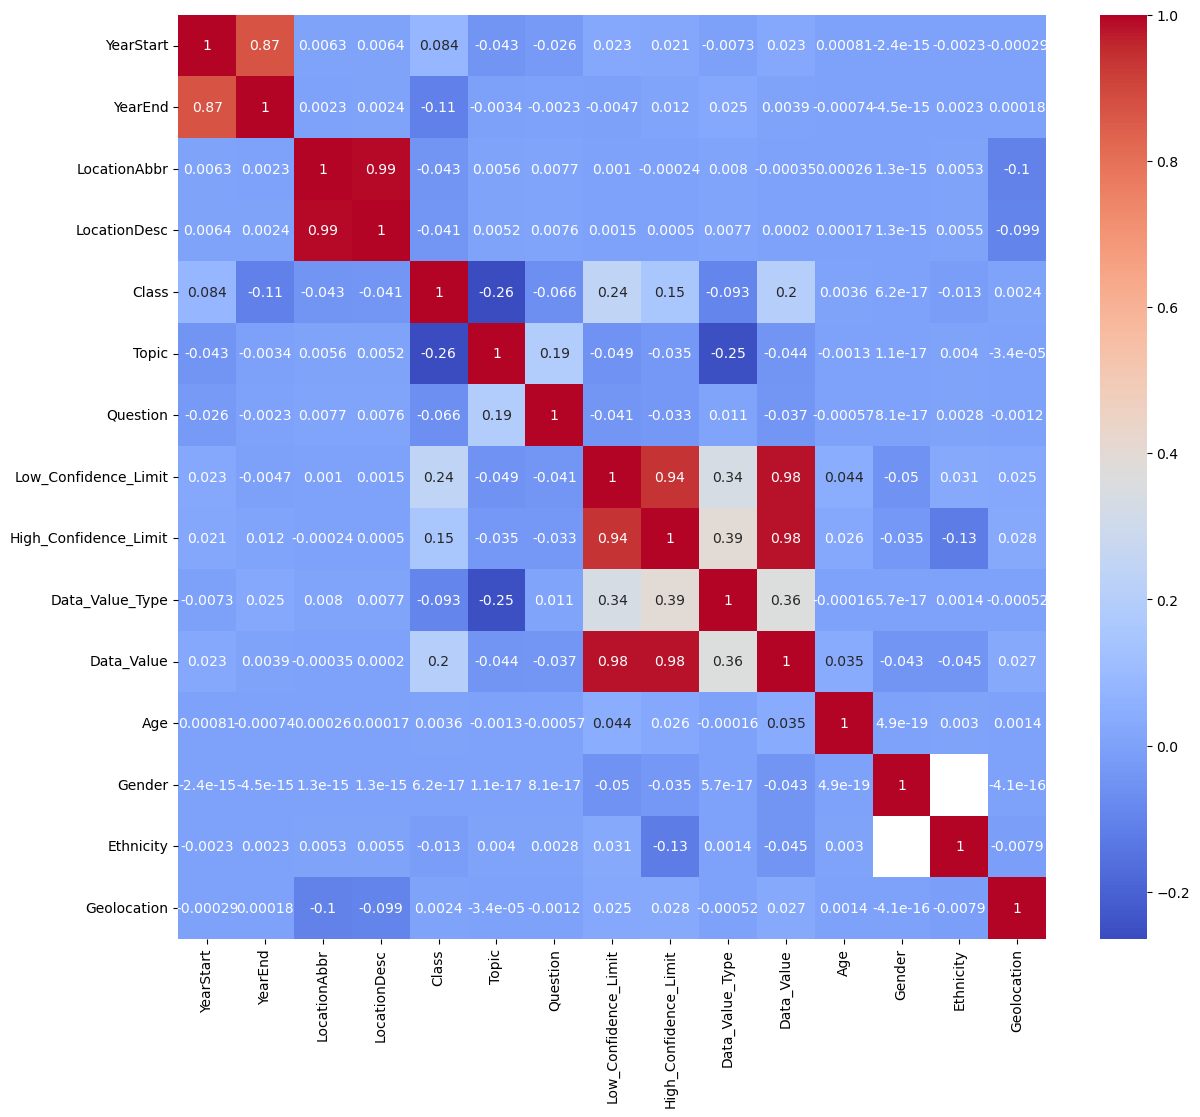

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter columns based on dtype
numerical_cols = df2.columns[df2.dtypes != 'object']  # Excludes all columns that are 'object' type, commonly used for strings
numerical_df = df2[numerical_cols]
# Assuming df is a pandas DataFrame with your data
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Non-numeric, Object type Columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter columns based on dtype
numerical_cols = df2.columns[df2.dtypes == 'object']  # Excludes all columns that are 'object' type, commonly used for strings
numerical_cols



Index([], dtype='object')

# Replacing Null Values

In [ ]:
# Write DataFrame to CSV file
df2.to_csv('Alzheimer_Disease_cat_new2.csv')

In [ ]:
df3= pd.read_csv('Alzheimer_Disease_cat_new2.csv')
#df3

In [ ]:
# Select only numeric (int, float) columns
numeric_df = df3.select_dtypes(include=['number'])
print("\nDataFrame with Only Numeric Columns:")
numeric_df.columns



DataFrame with Only Numeric Columns:


Index(['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Class', 'Topic', 'Question', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Data_Value_Type', 'Data_Value', 'Age',
       'Gender', 'Ethnicity', 'Geolocation'],
      dtype='object')

## Finding null values

In [ ]:
# Calculate the number of NaN values in each column
nan_count_per_column = df3.isna().sum()
nan_count_per_column

RowId                         0
YearStart                     0
YearEnd                       0
LocationAbbr                  0
LocationDesc                  0
Class                         0
Topic                         0
Question                      0
Low_Confidence_Limit      81811
High_Confidence_Limit     81811
Data_Value_Type               0
Data_Value                81635
Age                       84147
Gender                   190385
Ethnicity                 92928
Geolocation               26709
dtype: int64

## Age

In [ ]:
import pandas as pd

# Replace NaN values with mode for a given attribute
def replace_nan_with_mode(data, column):
    mode_val = data[column].mode()[0]
    data[column].fillna(mode_val, inplace=True)  # corrected from df to df2

# Specify the attribute/column name you want to replace NaN values for
column_name = 'Age'

# Call the function to replace NaN values with mode
replace_nan_with_mode(df3, column_name)

# Verify that NaN values have been replaced
missing_values_after = df3.isnull().sum()
print("\nMissing values after replacement:\n", missing_values_after)



Missing values after replacement:
 RowId                         0
YearStart                     0
YearEnd                       0
LocationAbbr                  0
LocationDesc                  0
Class                         0
Topic                         0
Question                      0
Low_Confidence_Limit      81811
High_Confidence_Limit     81811
Data_Value_Type               0
Data_Value                81635
Age                           0
Gender                   190385
Ethnicity                 92928
Geolocation               26709
dtype: int64


## Gender     

In [ ]:
import pandas as pd

# Replace NaN values with mode for a given attribute
def replace_nan_with_mode(data, column):
    mode_val = data[column].mode()[0]
    data[column].fillna(mode_val, inplace=True)  # corrected from df to df2

# Specify the attribute/column name you want to replace NaN values for
column_name = 'Gender'

# Call the function to replace NaN values with mode
replace_nan_with_mode(df3, column_name)

# Verify that NaN values have been replaced
missing_values_after = df3.isnull().sum()
print("\nMissing values after replacement:\n", missing_values_after)



Missing values after replacement:
 RowId                        0
YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
Class                        0
Topic                        0
Question                     0
Low_Confidence_Limit     81811
High_Confidence_Limit    81811
Data_Value_Type              0
Data_Value               81635
Age                          0
Gender                       0
Ethnicity                92928
Geolocation              26709
dtype: int64


In [ ]:
# Calculate the distribution of the existing non-null gender values
gender_distribution = df['gender'].value_counts(normalize=True)

# Number of null values in the 'gender' column
null_count = df['gender'].isnull().sum()

# Randomly assign genders to the null values based on the existing distribution
random_genders = np.random.choice(gender_distribution.index, size=null_count, p=gender_distribution.values)
df.loc[df['gender'].isnull(), 'gender'] = random_genders

## Here Low_Confidence_Limit, High_Confidence_Limit, Data_Value, Data_Value_Type, Geolocation, Ethnicity are depndent variables

In [ ]:
df3.set_index('RowId', inplace=True)


In [ ]:
df3.isna().sum()

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
Class                        0
Topic                        0
Question                     0
Low_Confidence_Limit         0
High_Confidence_Limit        0
Data_Value_Type              0
Data_Value                   0
Age                          0
Gender                       0
Ethnicity                    1
Geolocation              26709
dtype: int64

# Low Confidence limit

In [ ]:
group_attrs = ['Data_Value_Type', 'Class']

df3['Low_Confidence_Limit'] = df3.groupby(group_attrs)['Low_Confidence_Limit'].transform(lambda x: x.fillna(x.median()))


# High_Confidence_Limit

In [ ]:
group_attrs = ['Data_Value_Type', 'Class']

df3['High_Confidence_Limit'] = df3.groupby(group_attrs)['High_Confidence_Limit'].transform(lambda x: x.fillna(x.mean()))


# Data_Value

In [ ]:
df3['Data_Value'] = (df3['Low_Confidence_Limit'] + df3['High_Confidence_Limit'])/2

# Ethnicity

In [ ]:
group_attrs = 'Gender'
hi = df3.groupby(group_attrs)
print(hi)

In [ ]:
# Example of aggregation to create a new DataFrame
hi_agg = hi.sum()  # Summing up all the groups

# Example of transformation to create a new DataFrame
hi_transform = hi.transform(lambda x: x)  # Centering the data within each group


In [ ]:
df3

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation
RowId,,,,,,,,,,,,,,,
1,2021,2021,55,55,4,0,9,28.800000,34.40000,1,31.600000,0.0,0.0,2.0,NaN
2,2017,2017,35,37,4,0,9,49.100000,51.60000,1,50.350000,1.0,0.0,1.0,NaN
3,2019,2019,22,24,3,9,13,13.800000,14.80000,1,14.300000,0.0,0.0,5.0,NaN
4,2020,2020,49,49,4,0,9,54.500000,56.40000,1,55.450000,1.0,0.0,1.0,NaN
5,2020,2020,32,31,2,14,14,12.800000,18.00000,1,15.400000,0.0,0.0,5.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250933,2015,2015,57,56,1,34,30,23.038265,41.10100,1,32.069632,0.0,0.0,0.0,32.0
250934,2015,2015,39,39,4,30,2,4.700000,9.60000,0,7.150000,0.0,0.0,1.0,50.0
250935,2017,2017,32,31,4,33,38,19.500000,24.50000,1,22.000000,0.0,0.0,5.0,19.0


In [ ]:
hi_transform

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Ethnicity,Geolocation
RowId,,,,,,,,,,,,,,
1,2021,2021,55,55,4,0,9,28.800000,34.40000,1,31.600000,0.0,2.0,NaN
2,2017,2017,35,37,4,0,9,49.100000,51.60000,1,50.350000,1.0,1.0,NaN
3,2019,2019,22,24,3,9,13,13.800000,14.80000,1,14.300000,0.0,5.0,NaN
4,2020,2020,49,49,4,0,9,54.500000,56.40000,1,55.450000,1.0,1.0,NaN
5,2020,2020,32,31,2,14,14,12.800000,18.00000,1,15.400000,0.0,5.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250933,2015,2015,57,56,1,34,30,23.038265,41.10100,1,32.069632,0.0,0.0,32.0
250934,2015,2015,39,39,4,30,2,4.700000,9.60000,0,7.150000,0.0,1.0,50.0
250935,2017,2017,32,31,4,33,38,19.500000,24.50000,1,22.000000,0.0,5.0,19.0


In [ ]:
# Define the group attributes (columns for grouping)
group_attrs = 'High_Confidence_Limit'

# Define a function to perform the imputation
def fillna_mode_without_null(x):
    mode_values = x.mode()  # Calculate the mode
    if not mode_values.empty:  # Check if the mode is not empty (i.e., at least one non-null value exists)
        mode = mode_values.values[0]  # Get the first mode value
        print(mode_values.values[0])
        if pd.notnull(mode):  # Check if the mode is not null
            return x.fillna(mode)  # Fill NaNs with the mode if it's not null
    return x  # Return the original values if no mode or the mode is null

# Perform group-wise imputation
df3['Ethnicity'] = df3.groupby(group_attrs)['Ethnicity'].transform(fillna_mode_without_null)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
0.0
5.0
5.0
5.0
5.0
0.0
5.0
0.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
0.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
1.0
5.0
1.0
5.0
5.0
5.0
5.0
5.0
5.0
1.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
0.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
0.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0


# Geolocation

In [ ]:
# Fill null values in Geolocation based on LocationDesc
df3['Geolocation'] = df3.apply(lambda row: df3.get(row['LocationDesc'], row['Geolocation']), axis=1)


In [ ]:
df3['Ethnicity'].mode()

0    5.0
Name: Ethnicity, dtype: float64

In [ ]:
df3.isnull().sum()

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
Class                        0
Topic                        0
Question                     0
Low_Confidence_Limit         0
High_Confidence_Limit        0
Data_Value_Type              0
Data_Value                   0
Age                          0
Gender                       0
Ethnicity                    1
Geolocation              26709
dtype: int64

In [ ]:
# Function to calculate skewness, ignoring NaN values
def calculate_skewness(column):
    return skew(column.dropna())

# Apply the skewness function to each column in the DataFrame
skewness = df3.apply(calculate_skewness, axis=0)

# Display the skewness of each column
print(skewness)


YearStart                0.069364
YearEnd                 -0.084143
LocationAbbr            -0.024831
LocationDesc            -0.023368
Class                   -0.657523
Topic                   -0.005457
Question                -0.152755
Low_Confidence_Limit     0.703654
High_Confidence_Limit    0.289498
Data_Value_Type         -3.177412
Data_Value               0.478021
Age                      0.717607
Gender                   2.329275
Ethnicity               -0.369317
Geolocation             -0.033506
dtype: float64


In [ ]:
df3

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation
RowId,,,,,,,,,,,,,,,
1,2021,2021,55,55,4,0,9,28.800000,34.40000,1,31.600000,0.0,0.0,2.0,NaN
2,2017,2017,35,37,4,0,9,49.100000,51.60000,1,50.350000,1.0,0.0,1.0,NaN
3,2019,2019,22,24,3,9,13,13.800000,14.80000,1,14.300000,0.0,0.0,5.0,NaN
4,2020,2020,49,49,4,0,9,54.500000,56.40000,1,55.450000,1.0,0.0,1.0,NaN
5,2020,2020,32,31,2,14,14,12.800000,18.00000,1,15.400000,0.0,0.0,5.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250933,2015,2015,57,56,1,34,30,23.038265,41.10100,1,32.069632,0.0,0.0,0.0,32.0
250934,2015,2015,39,39,4,30,2,4.700000,9.60000,0,7.150000,0.0,0.0,1.0,50.0
250935,2017,2017,32,31,4,33,38,19.500000,24.50000,1,22.000000,0.0,0.0,5.0,19.0


## Covert non-numeric coulmns to numeric

In [ ]:
df3.isna().sum()

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
Class                        0
Topic                        0
Question                     0
Low_Confidence_Limit         0
High_Confidence_Limit        0
Data_Value_Type              0
Data_Value                   0
Age                          0
Gender                       0
Ethnicity                    0
Geolocation              26709
dtype: int64

In [ ]:
# Write DataFrame to CSV file
df3.to_csv('Alzheimer_Disease_notnull_hello.csv')

In [ ]:
# Find rows with at least one NaN
data = df3[['YearStart','YearEnd','LocationAbbr','LocationDesc', 'Class','Topic','Question','Low_Confidence_Limit','High_Confidence_Limit','Data_Value_Type', 'Data_Value','Age','Gender','Ethnicity']]
rows_with_nan = df3[data.isna().any(axis=1)]

In [ ]:
rows_with_nan

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation
RowId,,,,,,,,,,,,,,,
9075,2017,2017,27,26,6,1,27,0.6,1.7,1,1.15,1.0,0.0,NaN,43.0
